# chat gpt 능력을 활용하는 3가지 방법
### ChatGPT
### Bing.com 채팅
### OpenAI API

- Few shot 러닝
  - 모델이 1~5개 정도의 데이터로 학습(고양이와 개를구분한다고하면 고양2장 개2장)
  - 동작방법
    - 거대모델을 사용(GPR, BERT , CLIP) - Pre-trained모델
    - 샘플을 추가해서 미세조정(Fine-tuning) - > Few Shot 데이터를 사용
    - Prompting 활용
      텍스트 : "오늘 날씨가 너무 좋다"
      프롬프트 : " 이 텍스트가 긍정적인가요?"
      답변 : "긍정적입니다."

- Zero Shot 러닝
  - 한개의 예시만으로 학습
- One Shot 러닝
  - 학습없이도 문제를 해결(이 단어가 긍정인지 부정인지 답을제공)


# Few shot 학습예시
  - 문제 : 영화 리뷰가 긍정적인지 부정적인지 구분
  - 샘플데이터
    - 긍정적 리뷰 : " 이 영화는 정말 재미있어요"
    - 부정적 리뷰 : " 너무 지루해서 중간에 나왔어요"

In [3]:
# 주석은 컴퓨터가 인지하지않는 우리가 사용하는 설명문
# 컴퓨터에게 명령을 내리는 문장을작성 -- > 코딩 -> 서로간의 합의에 의한 규칙을 실행
# 문자열
'문자열'
"문자열"
'''줄바꿈을 포함한 여러개
한줄
두줄'''

2

Few-shot Prompt 기반 학습

In [5]:
from transformers import GPT2Tokenizer, GPTNeoForCausalLM


# GPT-2 모델 및 토크나이저 불러오기
tokenizer = GPT2Tokenizer.from_pretrained('minhtoan/gpt3-small-finetune-cnndaily-news')
model = GPTNeoForCausalLM.from_pretrained('minhtoan/gpt3-small-finetune-cnndaily-news')


# pad_token_id를 eos_token_id와 동일하게 설정
model.config.pad_token_id = model.config.eos_token_id

# few-shot 학습을 위한 프롬프트 작성 (예시 포함)
few_shot_prompt = """
Q: What's the capital of France?
A: Paris.

Q: Who wrote 'Romeo and Juliet'?
A: William Shakespeare.

Q: What is the largest planet in our solar system?
A: Jupiter.

Q: Who is the current president of the United States?
A:
"""

# 텍스트 인코딩
encoded_input = tokenizer(few_shot_prompt, return_tensors='pt')

# 모델의 출력 생성
output = model.generate(
    **encoded_input,
    max_length=150,  # 출력의 최대 길이 설정
    num_return_sequences=1,  # 생성할 출력 수
    no_repeat_ngram_size=2,  # 반복되는 n-그램 방지
    top_p=0.95,  # top-p 샘플링
    top_k=50  # top-k 샘플링
)

# 출력 텍스트 디코딩
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

# 결과 출력
print(generated_text)


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



Q: What's the capital of France?
A: Paris.

Q: Who wrote 'Romeo and Juliet'?
A: William Shakespeare.

Q: What is the largest planet in our solar system?
A: Jupiter.

Q: Who is the current president of the United States?
A: 
President Obama .
Obama is a former president .  The former England captain has been in the spotlight since the World Cup . The England international has scored just one goal in his last seven games . England's captain Chris Robshaw has also been linked with a move to the Premier League . Robshaws has played just once in England’s last six games, and has not scored a


In [13]:
from transformers import GPT2Tokenizer, GPTNeoForCausalLM


# GPT-2 모델 및 토크나이저 불러오기
tokenizer = GPT2Tokenizer.from_pretrained('minhtoan/gpt3-small-finetune-cnndaily-news')
model = GPTNeoForCausalLM.from_pretrained('minhtoan/gpt3-small-finetune-cnndaily-news')


# pad_token_id를 eos_token_id와 동일하게 설정
model.config.pad_token_id = model.config.eos_token_id

# few-shot 학습을 위한 프롬프트 작성 (예시 포함)
few_shot_prompt = """
  영어: "How are you?"
  한국어: "어떻게 지내세요?"
  영어: "What is your name?"
  한국어: "당신의 이름은 무엇인가요?"
  영어: "What is Few-Shot?"
  한국어 : "Few-Shot 은 적은데이터로 모델을 학습하는 방법입니다."
  영어: "I am learning Few-Shot prompting"
  한국어:
"""

# 텍스트 인코딩
encoded_input = tokenizer(few_shot_prompt, return_tensors='pt')

# 모델의 출력 생성
output = model.generate(
    **encoded_input,
    max_length=300,  # 출력의 최대 길이 설정
    num_return_sequences=1,  # 생성할 출력 수
    no_repeat_ngram_size=2,  # 반복되는 n-그램 방지
    top_p=0.95,  # top-p 샘플링
    top_k=50  # top-k 샘플링
)

# 출력 텍스트 디코딩
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

# 결과 출력
print(generated_text)


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



  영어: "How are you?"
  한국어: "어떻게 지내세요?"
  영어: "What is your name?"
  한국어: "당신의 이름은 무엇인가요?"
  영어: "What is Few-Shot?"
  한국어 : "Few-Shot 은 적은데이터로 모델을 학습하는 방법입니다."
  영어: "I am learning Few-Shot prompting"
  한국어:
"I have learned that the world is not a place where you can be a hero" 
The video was filmed by a man who was in the video for the film, who is now a professional actor .
He was filming the scene in a small town in New York, New Jersey, when he was shot .  The video has been viewed more than 1.5 million times


In [16]:
!pip install -q transformers torch

In [18]:
from transformers import MarianMTModel, MarianTokenizer

# 모델과 토크나이저 로드
model_name = "Helsinki-NLP/opus-mt-ko-en"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

# 한국어 텍스트 예시
korean_text = '''
대통령실은 1일 더불어민주당이 국회 예산결산특별위원회에서
단독 처리한 내년도 예산 감액안을 철회하지 않으면 추가 협상이 불가능하다고 밝혔다.
'''

# 텍스트 토큰화
translated = tokenizer(korean_text, return_tensors="pt", padding=True)

# 번역 수행
translation = model.generate(**translated)

# 결과 디코딩
translated_text = tokenizer.decode(translation[0], skip_special_tokens=True)

# 번역된 텍스트 출력
print("번역 결과:", translated_text)


번역 결과: The president's office, along with the first day, revealed that further negotiations could not be made without the next year's budget reduction which the Democrats handled alone by the National Council's Special Commission on Economic Distinguished.


streamlit 사용하기

In [19]:
!pip install -q streamlit transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [23]:
# app.py
import streamlit as st
from transformers import MarianMTModel, MarianTokenizer

# 모델과 토크나이저 로드
model_name = "Helsinki-NLP/opus-mt-ko-en"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

# Streamlit 앱 제목 설정
st.title("한국어 → 영어 번역기")

# 사용자가 입력할 한국어 텍스트 받기
korean_text = st.text_area("한국어 텍스트를 입력하세요", height=150)

# 번역 버튼 클릭 시 번역 수행
if st.button("번역하기"):
    if korean_text:
        # 텍스트 토큰화
        translated = tokenizer(korean_text, return_tensors="pt", padding=True)

        # 번역 수행
        translation = model.generate(**translated)

        # 결과 디코딩
        translated_text = tokenizer.decode(translation[0], skip_special_tokens=True)

        # 번역된 텍스트 출력
        st.subheader("번역 결과:")
        st.write(translated_text)
    else:
        st.warning("번역할 텍스트를 입력해주세요.")


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
2024-12-01 07:20:45.225 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 07:20:45.405 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-01 07:20:45.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 07:20:45.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 07:20:45.414 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 07:20:45.416 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored

In [24]:
# app.py 파일 내용을 작성하여 저장하는 코드
app_code = """
import streamlit as st
from transformers import MarianMTModel, MarianTokenizer

# 모델과 토크나이저 로드
model_name = "Helsinki-NLP/opus-mt-ko-en"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

# Streamlit 앱 제목 설정
st.title("한국어 → 영어 번역기")

# 사용자가 입력할 한국어 텍스트 받기
korean_text = st.text_area("한국어 텍스트를 입력하세요", height=150)

# 번역 버튼 클릭 시 번역 수행
if st.button("번역하기"):
    if korean_text:
        # 텍스트 토큰화
        translated = tokenizer(korean_text, return_tensors="pt", padding=True)

        # 번역 수행
        translation = model.generate(**translated)

        # 결과 디코딩
        translated_text = tokenizer.decode(translation[0], skip_special_tokens=True)

        # 번역된 텍스트 출력
        st.subheader("번역 결과:")
        st.write(translated_text)
    else:
        st.warning("번역할 텍스트를 입력해주세요.")
"""

# 파일로 저장
file_path = '/content/app.py'
with open(file_path, 'w') as f:
    f.write(app_code)

# 파일 다운로드 링크 생성
from google.colab import files
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- 서버형태 또는 웹형태로 서비스 하려면 코렙에서는 거의 불가능하다.
- 왜냐면 코렙은 구글의 서버로서 외부로 서비스하는걸 막아놓음
- 개발은 코렙에서 gpt를 이용해서 완료하면
- 실행은 로컬에서 실행한다.
- 실행방법은 파이썬을 설치하고.. 오류가 나면 gpt를 이용해서 해결방안을 얻어서 사용 - 주로 라이브러리를 install하는 문제가 다수임

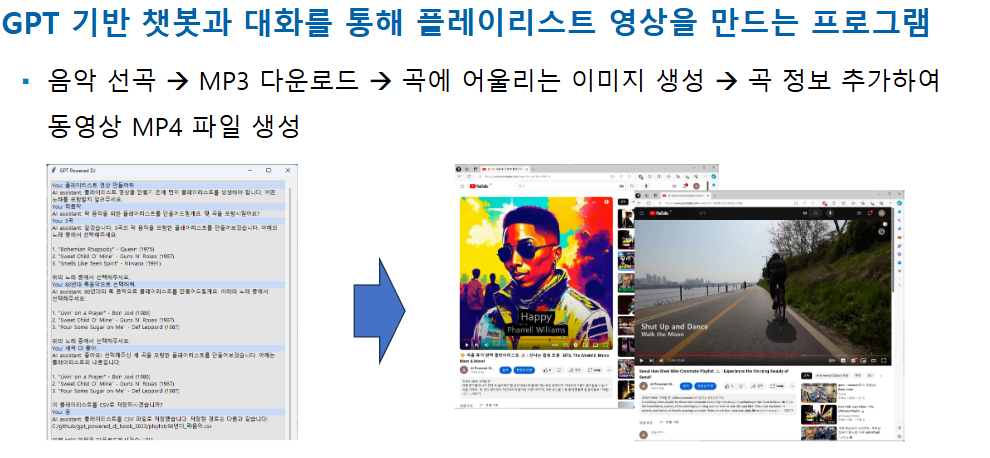